<img src="https://images.pexels.com/photos/2803160/pexels-photo-2803160.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=750&w=1260" style="height: 650px" />
Fonte: <a href="https://www.pexels.com/pt-br/foto/adulto-ao-ar-livre-atividade-fisica-atleta-2803160/" target="_blank">Pexels.com<a>

# Introdução

Este projeto tem por objetivo efetuar análise exploratório e aplicar técnicas de machine learning para encontrar padrões e coisas interessantes sobre um conjunto de dados pessoal.

Esse conjunto de dados representa dados de corridas de rua realizadas por mim.

Os dados foram extraídos manualmente a partir do aplicativo MiFit que armazena os dados de exercícios coletados pelo smartwatch Amazfit Bip da Xiaomi.

# Imports

In [26]:
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Leitura dos dados

In [3]:
df = pd.read_csv('data/dados.csv')
df.head()

,start_time,distance,duration,avg_pace,calories,avg_heart_rate,cadence,step,min_pace,max_heart_rate,km_min_pace,5km_pace,5km_duration
0,2019-11-02 17:28,3.52,00:19:57,00:05:39,266,153,159,99,00:05:09,178,1,NaN,NaN
1,2019-11-05 16:38,5.10,00:30:24,00:05:57,375,154,164,92,00:05:37,180,2,00:05:55,00:29:40
2,2019-11-08 17:52,4.09,00:23:16,00:05:41,296,157,162,96,00:05:21,180,3,NaN,NaN
3,2019-11-11 17:29,5.51,00:30:35,00:05:32,422,167,165,96,00:05:20,179,1,00:05:50,00:27:22
4,2019-11-13 17:00,5.37,00:30:23,00:05:39,393,156,162,99,00:05:29,177,3,00:05:47,00:28:05


## Dicionário de dados

- **start_time**: Data/hora em que a corrida foi iniciada.
- **distance**: Distância percorrida em KM.
- **duration**: Duração do percurso.
- **avg_pace**: Ritmo médio, ou seja, quantos minutos em média levou para completar 1Km.
- **calories**: Calorias gastas.
- **avg_heart_rate**: Frequência cardíaca média.
- **cadence**: Cadência é a frequência média de passos dados por minuto em uma corrida.
- **step**: Passada.
- **min_pace**: Pace/ritmo mais rápido.
- **max_heart_rate**: Frequência cardíaca máxima.
- **km_min_pace**: Km que teve o menor pace/ritmo.
- **5km_pace**: Pace referente ao 5Km.
- **5km_duration**: Duração referente ao 5Km.

## Informações sobre as variáveis

### Cadência

É a frequência de passos dados em uma corrida. Basta que você conte os seus passos no intervalo de 1 minuto para encontrar o valor atual da sua. Esse número tende a ser algo entre 160 e 190 passos, sendo que é comum os atletas considerarem o número de 180 ppm (passos por minuto) o ideal.

Fonte: <a href="https://corridaperfeita.com/cadencia-na-corrida/">Corrida perfeita - Acerte a cadência na corrida para correr melhor</a>

### Passada

É a distância em centímetros da pisada no chão de um mesmo pé.

# Perguntas

Nessa fase são elencadas quais as perguntas que devem ser respondidas através dos dados coletados.

## Cadência

- Quando a cadência foi maior o desempenho foi melhor, e vice-versa?
- Em que momentos do dia a cadência foi melhor?

## Passada

- Qual relação da passada com o ritmo menor/maior?

## Ritmo

- Há diferença de desempenho nos períodos manhã, tarde e noite?
- Em que momentos do dia o desempenho foi melhor?
- O pace/ritmo médio está evoluindo?
- Qual o pace ideal para corridas de 5K?
- É possível prever em quanto tempo chegarei num pace ideal?
- Qual o Km que tem o melhor pace?
- Como está a evolução do pace nos 5Km?
- Qual a tendência de ritmo/pace do início da corrida até o fim?

## Frequência cardíaca

- Qual a relação da frequência cardíaca com pace menor/maior?

# Limpeza dos dados

Nessa fase são aplicadas limpezas e tratamento de dados de acordo com as necessidades.

## Transformações

Várias colunas estão com formatos texto para representar os tempos e devem ser formatadas para números.

**Funções para transformação**

In [9]:
def transform_time_into_duration_seconds(time):
    """
    Tranform time string into duration in seconds.
    
    Attributes:
    ----------
    time : str
        time string that needs to be in format "HH:MM:SS"
    
    Returns
    -------
    int
        time duration in seconds      
    """
    if isinstance(time, str):
        hours, minutes, seconds = map(int, time.split(":"))
        duration = (hours * 3600) + (minutes * 60) + seconds
        return duration


def transform_duration_seconds_into_time(seconds):
    """
    Tranform durantion seconds into time.
    
    Attributes:
    ----------
    seconds : int
        duration in seconds
    
    Returns
    -------
    str
        time in format "HH:MM:SS"     
    """        
    return time.strftime('%H:%M:%S', time.gmtime(seconds))

**Aplicando a transformação**

In [5]:
columns = ['duration', 'avg_pace', 'min_pace', '5km_pace', '5km_duration']
for column in columns:
    df[column+'_sec'] = df[column].map(lambda value: transform_time_into_duration_seconds(value))

In [6]:
df.head()

,start_time,distance,duration,avg_pace,calories,avg_heart_rate,cadence,step,min_pace,max_heart_rate,km_min_pace,5km_pace,5km_duration,duration_sec,avg_pace_sec,min_pace_sec,5km_pace_sec,5km_duration_sec
0,2019-11-02 17:28,3.52,00:19:57,00:05:39,266,153,159,99,00:05:09,178,1,NaN,NaN,1197,339,309,NaN,NaN
1,2019-11-05 16:38,5.10,00:30:24,00:05:57,375,154,164,92,00:05:37,180,2,00:05:55,00:29:40,1824,357,337,355.0,1780.0
2,2019-11-08 17:52,4.09,00:23:16,00:05:41,296,157,162,96,00:05:21,180,3,NaN,NaN,1396,341,321,NaN,NaN
3,2019-11-11 17:29,5.51,00:30:35,00:05:32,422,167,165,96,00:05:20,179,1,00:05:50,00:27:22,1835,332,320,350.0,1642.0
4,2019-11-13 17:00,5.37,00:30:23,00:05:39,393,156,162,99,00:05:29,177,3,00:05:47,00:28:05,1823,339,329,347.0,1685.0


## Dados faltantes

In [14]:
df.isna().sum()

start_time           0
distance             0
duration             0
avg_pace             0
calories             0
avg_heart_rate       0
cadence              0
step                 0
min_pace             0
max_heart_rate       0
km_min_pace          0
5km_pace            11
5km_duration        11
duration_sec         0
avg_pace_sec         0
min_pace_sec         0
5km_pace_sec        11
5km_duration_sec    11
dtype: int64

A coluna **5km_pace** e **5km_duration** tem linhas que possuem valor nulo, que são aquelas em que a distância percorrida não passou dos 5Km. 

Para estes casos, será atribuído a média dessa coluna, com base nas linhas que tem valor registrado.

In [ ]:
#...

# Análise Exploratória

Nessa fase são feitas as análise de forma a responder as perguntas elencadas anteriormente.

In [15]:
df.describe()

,distance,calories,avg_heart_rate,cadence,step,max_heart_rate,km_min_pace,duration_sec,avg_pace_sec,min_pace_sec,5km_pace_sec,5km_duration_sec
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,25.000000,25.000000
mean,5.125000,372.888889,158.694444,163.611111,100.611111,175.666667,2.250000,1735.416667,340.111111,322.833333,338.160000,1659.680000
std,1.137053,90.478972,6.602248,4.224269,11.339634,3.824732,1.250714,356.289319,20.112225,15.977663,11.327253,44.670759
min,2.510000,176.000000,134.000000,145.000000,81.000000,166.000000,1.000000,912.000000,315.000000,277.000000,317.000000,1557.000000
25%,4.482500,320.500000,155.000000,162.000000,96.000000,173.000000,1.000000,1553.250000,331.750000,315.000000,332.000000,1642.000000
50%,5.350000,381.000000,159.000000,164.000000,98.000000,176.500000,2.000000,1801.500000,337.500000,323.500000,339.000000,1666.000000
75%,6.010000,438.000000,163.250000,166.000000,100.000000,178.000000,3.000000,1977.000000,342.250000,328.250000,348.000000,1684.000000
max,7.350000,553.000000,167.000000,168.000000,141.000000,184.000000,5.000000,2449.000000,440.000000,383.000000,355.000000,1780.000000


CONTINUA...

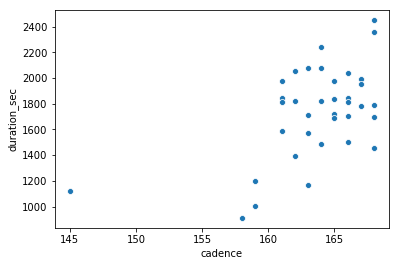

In [20]:
sns.scatterplot(data = df, x = 'cadence', y = 'duration_sec')

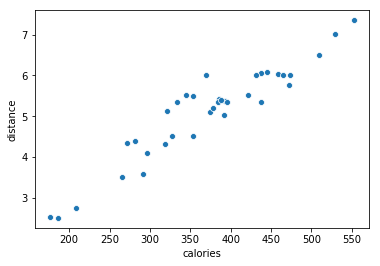

In [22]:
sns.scatterplot(data = df, x = 'calories', y = 'distance')

In [23]:
df.corr()

,distance,calories,avg_heart_rate,cadence,step,max_heart_rate,km_min_pace,duration_sec,avg_pace_sec,min_pace_sec,5km_pace_sec,5km_duration_sec
distance,1.000000,0.942494,0.619128,0.644687,0.093711,0.409823,0.278958,0.987188,-0.547212,-0.407432,-0.348324,-0.109705
calories,0.942494,1.000000,0.513483,0.529738,-0.113605,0.335342,0.237583,0.940729,-0.479906,-0.378649,-0.214512,0.033338
avg_heart_rate,0.619128,0.513483,1.000000,0.766000,0.399459,0.499351,-0.080446,0.557927,-0.690645,-0.498317,0.099893,-0.257491
cadence,0.644687,0.529738,0.766000,1.000000,0.407117,0.600076,0.083821,0.550615,-0.854002,-0.677874,-0.193077,-0.460483
step,0.093711,-0.113605,0.399459,0.407117,1.000000,0.075319,0.093676,0.040973,-0.355092,-0.112490,-0.033344,-0.182243
max_heart_rate,0.409823,0.335342,0.499351,0.600076,0.075319,1.000000,0.179182,0.351400,-0.544756,-0.509150,0.285551,0.011423
km_min_pace,0.278958,0.237583,-0.080446,0.083821,0.093676,0.179182,1.000000,0.289375,-0.080644,0.109376,-0.204711,0.178416
duration_sec,0.987188,0.940729,0.557927,0.550615,0.040973,0.351400,0.289375,1.000000,-0.415761,-0.273979,-0.218023,0.119110
avg_pace_sec,-0.547212,-0.479906,-0.690645,-0.854002,-0.355092,-0.544756,-0.080644,-0.415761,1.000000,0.855478,0.480609,0.952315
min_pace_sec,-0.407432,-0.378649,-0.498317,-0.677874,-0.112490,-0.509150,0.109376,-0.273979,0.855478,1.000000,0.391111,0.852310


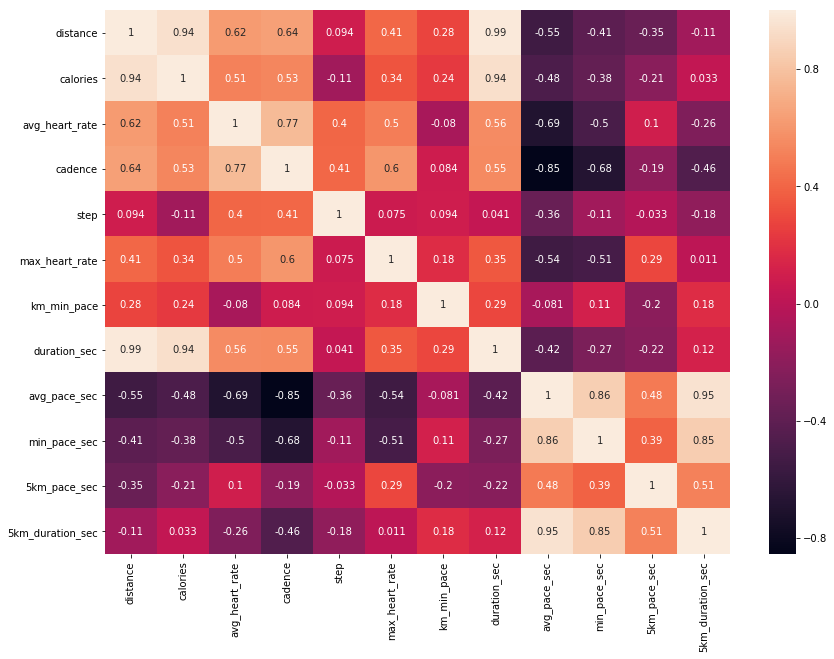

In [31]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

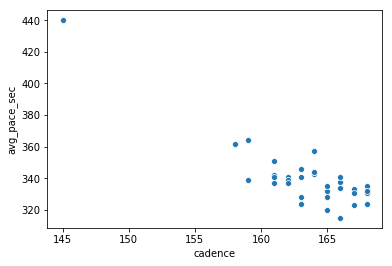

In [32]:
sns.scatterplot(data = df, x = 'cadence', y = 'avg_pace_sec')